<h3>Part I: Research Question</h3>
<p>1.	Can we use the Market Basket Analysis model to identify the key associations of customer purchases?
<p>2.	This study aims to prepare data and use the Market Basket Analysis model to analyze customers' purchases and identify the key associations, providing recommendations.

<h3>Part II: Method Justification</h3>

<p>1.	The Market Basket Analysis is a modeling technique used by retailers to increase sales by better understanding customer purchasing patterns. 
The Market Basket Analysis analyzes the data set such as purchase transactions history to reveal product groupings and products likely to be purchased together.(TechTarget 2021)
In Market Basket Analysis, association rules are used to predict the likelihood of products being purchased together. Associations rules count the frequency of items that occur together, finding association that occurs far more often than expected.(TechTarget 2021)

<p>2.	Transaction in the Dataset like list of purchase items in one transaction as follows:
<p>i.	Apple Lightning to Digital AV Adapter
<p>ii.	TP-Link AC1750 Smart WiFi Router
<p>iii.	Apple Pencil
<h3>Assumption:</h3>
<p>The underlying assumption in Market Basket Analysis is that joint occurrence of two or more products in most baskets implies that these products are complements in the purchase. Therefore, the purchase of one goes lead to the purchase of others; in this study.
(WordPress 2021)


In [201]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import seaborn as sns

In [206]:
# load the data set.
df = pd.read_csv(r"teleco_market_basket.csv")

# Display Data
df

,Item01,Item02,Item03,Item04,Item05,Item06,Item07,Item08,Item09,Item10,Item11,Item12,Item13,Item14,Item15,Item16,Item17,Item18,Item19,Item20
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Logitech M510 Wireless mouse,HP 63 Ink,HP 65 ink,nonda USB C to USB Adapter,10ft iPHone Charger Cable,HP 902XL ink,Creative Pebble 2.0 Speakers,Cleaning Gel Universal Dust Cleaner,Micro Center 32GB Memory card,YUNSONG 3pack 6ft Nylon Lightning Cable,TopMate C5 Laptop Cooler pad,Apple USB-C Charger cable,HyperX Cloud Stinger Headset,TONOR USB Gaming Microphone,Dust-Off Compressed Gas 2 pack,3A USB Type C Cable 3 pack 6FT,HOVAMP iPhone charger,SanDisk Ultra 128GB card,FEEL2NICE 5 pack 10ft Lighning cable,FEIYOLD Blue light Blocking Glasses
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Apple Lightning to Digital AV Adapter,TP-Link AC1750 Smart WiFi Router,Apple Pencil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14997,Falcon Dust Off Compressed Gas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14999,HP 63XL Ink,Apple USB-C Charger cable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [226]:
# Drop null rows
df_clean = df.dropna(how='all')#.fillna(0)

# Convert to List
transactions = list(df_clean.values)

# Clean Nan per row
for i in range(0, len(transactions)):
    transactions[i]= transactions[i][~pd.isnull(transactions[i])]

df_clean = pd.DataFrame(transactions)

# Save clean copy after Data preparation.
df_clean.to_csv("prepared_dataset.csv")

# Display Cleaned transactions
df_clean

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,Logitech M510 Wireless mouse,HP 63 Ink,HP 65 ink,nonda USB C to USB Adapter,10ft iPHone Charger Cable,HP 902XL ink,Creative Pebble 2.0 Speakers,Cleaning Gel Universal Dust Cleaner,Micro Center 32GB Memory card,YUNSONG 3pack 6ft Nylon Lightning Cable,TopMate C5 Laptop Cooler pad,Apple USB-C Charger cable,HyperX Cloud Stinger Headset,TONOR USB Gaming Microphone,Dust-Off Compressed Gas 2 pack,3A USB Type C Cable 3 pack 6FT,HOVAMP iPhone charger,SanDisk Ultra 128GB card,FEEL2NICE 5 pack 10ft Lighning cable,FEIYOLD Blue light Blocking Glasses
1,Apple Lightning to Digital AV Adapter,TP-Link AC1750 Smart WiFi Router,Apple Pencil,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,UNEN Mfi Certified 5-pack Lightning Cable,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,Cat8 Ethernet Cable,HP 65 ink,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,Dust-Off Compressed Gas 2 pack,Screen Mom Screen Cleaner kit,Moread HDMI to VGA Adapter,HP 62XL Tri-Color ink,Apple USB-C Charger cable,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,SanDisk 32GB Ultra SDHC card,Vsco 70 pack stickers,SanDisk 128GB microSDXC card,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
7497,Apple Lightning to Digital AV Adapter,Nylon Braided Lightning to USB cable,Apple Pencil,USB 2.0 Printer cable,ARRIS SURFboard SB8200 Cable Modem,Apple USB-C Charger cable,None,None,None,None,None,None,None,None,None,None,None,None,None,None
7498,Falcon Dust Off Compressed Gas,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
7499,HP 63XL Ink,Apple USB-C Charger cable,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [208]:
# Display one transaction
df_clean.head(1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,Logitech M510 Wireless mouse,HP 63 Ink,HP 65 ink,nonda USB C to USB Adapter,10ft iPHone Charger Cable,HP 902XL ink,Creative Pebble 2.0 Speakers,Cleaning Gel Universal Dust Cleaner,Micro Center 32GB Memory card,YUNSONG 3pack 6ft Nylon Lightning Cable,TopMate C5 Laptop Cooler pad,Apple USB-C Charger cable,HyperX Cloud Stinger Headset,TONOR USB Gaming Microphone,Dust-Off Compressed Gas 2 pack,3A USB Type C Cable 3 pack 6FT,HOVAMP iPhone charger,SanDisk Ultra 128GB card,FEEL2NICE 5 pack 10ft Lighning cable,FEIYOLD Blue light Blocking Glasses


In [223]:
# Instantiate transaction encoder
encoder = TransactionEncoder().fit(transactions)

# One-hot encode itemsets by applying fit and transform
onehot = encoder.transform(transactions)

In [213]:
# Convert one-hot encoded data to DataFrame
onehot = pd.DataFrame(onehot, columns = encoder.columns_)

print(onehot.head())

   10ft iPHone Charger Cable  10ft iPHone Charger Cable 2 Pack  \
0                       True                             False   
1                      False                             False   
2                      False                             False   
3                      False                             False   
4                      False                             False   

   3 pack Nylon Braided Lightning Cable  3A USB Type C Cable 3 pack 6FT  \
0                                 False                            True   
1                                 False                           False   
2                                 False                           False   
3                                 False                           False   
4                                 False                           False   

   5pack Nylon Braided USB C cables  ARRIS SURFboard SB8200 Cable Modem  \
0                             False                               False   
1 

In [214]:
# Generate frequent itemsets
frequent_itemsets = apriori(onehot, min_support = 0.01, use_colnames = True, max_len = 2)

In [215]:
# Generate association rules
rules = association_rules(frequent_itemsets, metric = 'lift', min_threshold = 1.00)

In [216]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Dust-Off Compressed Gas 2 pack),(10ft iPHone Charger Cable 2 Pack),0.238368,0.050527,0.023064,0.096756,1.914955,0.011020,1.051182
1,(10ft iPHone Charger Cable 2 Pack),(Dust-Off Compressed Gas 2 pack),0.050527,0.238368,0.023064,0.456464,1.914955,0.011020,1.401255
2,(10ft iPHone Charger Cable 2 Pack),(HP 61 ink),0.050527,0.163845,0.010132,0.200528,1.223888,0.001853,1.045884
3,(HP 61 ink),(10ft iPHone Charger Cable 2 Pack),0.163845,0.050527,0.010132,0.061839,1.223888,0.001853,1.012058
4,(10ft iPHone Charger Cable 2 Pack),(Screen Mom Screen Cleaner kit),0.050527,0.129583,0.015198,0.300792,2.321232,0.008651,1.244861
...,...,...,...,...,...,...,...,...,...
301,(TopMate C5 Laptop Cooler pad),(USB 2.0 Printer cable),0.076523,0.170911,0.013332,0.174216,1.019340,0.000253,1.004003
302,(TopMate C5 Laptop Cooler pad),(VIVO Dual LCD Monitor Desk mount),0.076523,0.174110,0.015198,0.198606,1.140693,0.001875,1.030567
303,(VIVO Dual LCD Monitor Desk mount),(TopMate C5 Laptop Cooler pad),0.174110,0.076523,0.015198,0.087289,1.140693,0.001875,1.011796
304,(VicTsing Wireless mouse),(VIVO Dual LCD Monitor Desk mount),0.028130,0.174110,0.010265,0.364929,2.095966,0.005368,1.300468


<AxesSubplot:xlabel='antecedents', ylabel='consequents'>

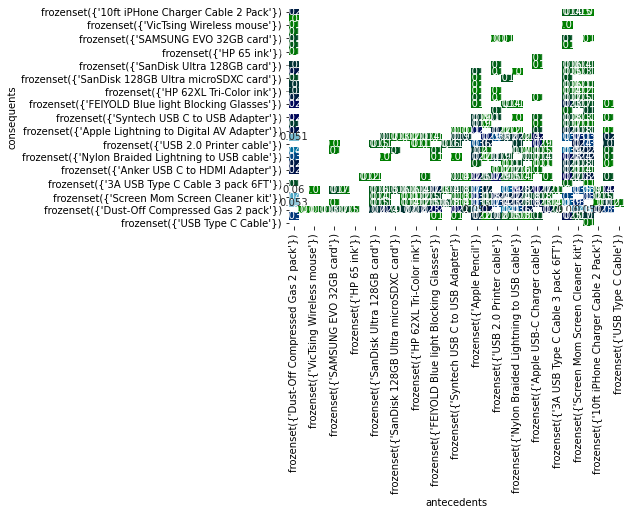

In [217]:
# Transform antecedent, consequent, and support columns into matrix
support_table = rules.pivot(index='consequents', columns='antecedents', values='support')

# Generate heatmap
sns.heatmap(support_table, annot=True, cbar=False, cmap='ocean')

In [218]:
# Showing the top rules by Support
rules.sort_values(by ='support', ascending = False, inplace = True)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
162,(Dust-Off Compressed Gas 2 pack),(VIVO Dual LCD Monitor Desk mount),0.238368,0.174110,0.059725,0.250559,1.439085,0.018223,1.102008
163,(VIVO Dual LCD Monitor Desk mount),(Dust-Off Compressed Gas 2 pack),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314
131,(HP 61 ink),(Dust-Off Compressed Gas 2 pack),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357
130,(Dust-Off Compressed Gas 2 pack),(HP 61 ink),0.238368,0.163845,0.052660,0.220917,1.348332,0.013604,1.073256
61,(Apple Pencil),(Dust-Off Compressed Gas 2 pack),0.179709,0.238368,0.050927,0.283383,1.188845,0.008090,1.062815
60,(Dust-Off Compressed Gas 2 pack),(Apple Pencil),0.238368,0.179709,0.050927,0.213647,1.188845,0.008090,1.043158
155,(Screen Mom Screen Cleaner kit),(Dust-Off Compressed Gas 2 pack),0.129583,0.238368,0.047994,0.370370,1.553774,0.017105,1.209650
154,(Dust-Off Compressed Gas 2 pack),(Screen Mom Screen Cleaner kit),0.238368,0.129583,0.047994,0.201342,1.553774,0.017105,1.089850
152,(SanDisk Ultra 64GB card),(Dust-Off Compressed Gas 2 pack),0.098254,0.238368,0.040928,0.416554,1.747522,0.017507,1.305401
153,(Dust-Off Compressed Gas 2 pack),(SanDisk Ultra 64GB card),0.238368,0.098254,0.040928,0.171700,1.747522,0.017507,1.088672


In [227]:
# Showing the top rules by Support
rules.sort_values(by ='lift', ascending = False, inplace = True)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
265,(SanDisk 128GB Ultra microSDXC card),(SanDisk Ultra 64GB card),0.049460,0.098254,0.015998,0.323450,3.291994,0.011138,1.332860
264,(SanDisk Ultra 64GB card),(SanDisk 128GB Ultra microSDXC card),0.098254,0.049460,0.015998,0.162822,3.291994,0.011138,1.135410
23,(Nylon Braided Lightning to USB cable),(Anker USB C to HDMI Adapter),0.095321,0.068391,0.016131,0.169231,2.474464,0.009612,1.121381
22,(Anker USB C to HDMI Adapter),(Nylon Braided Lightning to USB cable),0.068391,0.095321,0.016131,0.235867,2.474464,0.009612,1.183930
231,(Logitech M510 Wireless mouse),(Nylon Braided Lightning to USB cable),0.071457,0.095321,0.016664,0.233209,2.446574,0.009853,1.179825
230,(Nylon Braided Lightning to USB cable),(Logitech M510 Wireless mouse),0.095321,0.071457,0.016664,0.174825,2.446574,0.009853,1.125268
4,(10ft iPHone Charger Cable 2 Pack),(Screen Mom Screen Cleaner kit),0.050527,0.129583,0.015198,0.300792,2.321232,0.008651,1.244861
5,(Screen Mom Screen Cleaner kit),(10ft iPHone Charger Cable 2 Pack),0.129583,0.050527,0.015198,0.117284,2.321232,0.008651,1.075627
21,(Logitech M510 Wireless mouse),(Anker USB C to HDMI Adapter),0.071457,0.068391,0.011199,0.156716,2.291481,0.006311,1.104740
20,(Anker USB C to HDMI Adapter),(Logitech M510 Wireless mouse),0.068391,0.071457,0.011199,0.163743,2.291481,0.006311,1.110355


In [228]:
# Showing the top rules by Support
rules.sort_values(by ='confidence', ascending = False, inplace = True)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(10ft iPHone Charger Cable 2 Pack),(Dust-Off Compressed Gas 2 pack),0.050527,0.238368,0.023064,0.456464,1.914955,0.011020,1.401255
127,(FEIYOLD Blue light Blocking Glasses),(Dust-Off Compressed Gas 2 pack),0.065858,0.238368,0.027596,0.419028,1.757904,0.011898,1.310962
152,(SanDisk Ultra 64GB card),(Dust-Off Compressed Gas 2 pack),0.098254,0.238368,0.040928,0.416554,1.747522,0.017507,1.305401
9,(3A USB Type C Cable 3 pack 6FT),(Dust-Off Compressed Gas 2 pack),0.042528,0.238368,0.017064,0.401254,1.683336,0.006927,1.272045
167,(iPhone Charger Cable Anker 6ft),(Dust-Off Compressed Gas 2 pack),0.025730,0.238368,0.010265,0.398964,1.673729,0.004132,1.267198
278,(SanDisk Ultra 64GB card),(VIVO Dual LCD Monitor Desk mount),0.098254,0.174110,0.039195,0.398915,2.291162,0.022088,1.373997
143,(Premium Nylon USB Cable),(Dust-Off Compressed Gas 2 pack),0.051060,0.238368,0.020131,0.394256,1.653978,0.007960,1.257349
165,(VicTsing Wireless mouse),(Dust-Off Compressed Gas 2 pack),0.028130,0.238368,0.010932,0.388626,1.630358,0.004227,1.245770
129,(Falcon Dust Off Compressed Gas),(Dust-Off Compressed Gas 2 pack),0.059992,0.238368,0.022797,0.380000,1.594172,0.008497,1.228438
141,(Nylon Braided Lightning to USB cable),(Dust-Off Compressed Gas 2 pack),0.095321,0.238368,0.035729,0.374825,1.572463,0.013007,1.218270


<h3>Part V: Data Summary and Implications</h3>

<h3>The Summary:</h3>
<p>1.	Summarize the significance. 
<p>i.	Support: indicate the item popularity in the transactions and measure the percentage appearing in the transactions. For example, the top support item in the study is 0.059 mean significance appearing in about 6% of all the transactions.
<p>ii.	 Lift: indicate how likely the consequent item appears in the purchase transaction if the antecedent item is included in the same purchase transaction. For example, the top Lift item in the study is 3.29, which is greater than one, meaning significance there is a very likely purchase of the consequent item if the antecedent item is purchased.
<p>iii.	Confidence: indicate how likely the consequent item appears in the purchase transaction if the antecedent item is included in the same purchase transaction and measured in percentage. For example, the top Confidence item in the study is 0.45, meaning significance in about 45 % percent that the consequent item will be purchased if the antecedent item is purchased.

<p>2.	The study found that the Market Basket Analysis is a perfect practical significance tool to analyze the purchase history and define the associations between the purchased items, improving the business decision and increasing sales. 
For example, the results show (Dust-Off Compressed Gas 2 pack) and (VIVO Dual LCD Monitor Desk mount) items together appear in 6% in the purchase transactions and the significant relation between (SanDisk 128GB Ultra microSDXC card) and (SanDisk Ultra 64GB card) items in the purchase history. About 45 % percent that the (Dust-Off Compressed Gas 2 pack) item will appear in the transaction if the customer purchase (10ft iPhone Charger Cable 2 Pack) item, the Market team could use the top items for support, lift. Confidence items list analyzes and defines customer behavior and characteristics and improves marketing plans and offers, which support increased sales.

<p>3.	Actionable recommendations:
<p>The telecommunications providers could use the algorithm to define the associations between the purchased items and define the customer characteristics, targeting the marketing proposals like offering the associated items together based on the algorithm results. Moreover, the algorithm could improve business decisions and increase sales.
The Market team could use the top items for support, lift, and Confidence lists as reports as valuable information and recommendation to improve marketing plans and offers, which support increased sales.
For example, the market team could use the top list of confidence and lift to create offers for the items together in one offer and use the top of the support list to increase the number of items available in the store. Both recommendations will improve the sales. 

<h3>Acknowledge Sources: </h3>
Towards Data Science. (2021, November 17) Market Basket Analysis. [Web Site].  Retrieved from 
https://towardsdatascience.com/market-basket-analysis-on-online-retail-data-24ee7214a762

TechTarget. (2021, November 17) Market Basket Analysis. [Web Site].  Retrieved from
https://searchcustomerexperience.techtarget.com/definition/market-basket-analysis

WordPress. (2021, November 17) Market Basket Analysis. [Web Site].  Retrieved from
https://sarahtianhua.wordpress.com/portfolio/market-basket-analysis/
